# Análise exploratória de dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown as md
%matplotlib inline

# 1. Descrição dos dados

In [2]:
df_dict = pd.read_csv("../data/external/dicionario.csv")
df = pd.read_csv("../data/raw/Churn_Modelling.csv")

#Print Descrição
display(md("### `Descrição do DataSet`"))
display(md(""" --- \nEste conjunto de dados contém informações sobre **clientes bancários e seu status de rotatividade**, 
                 o que indica se eles saíram do banco ou não. É adequado para explorar e analisar fatores que influenciam a 
                 rotatividade de clientes em instituições bancárias e para construir modelos preditivos para identificar clientes em risco de rotatividade.\n
--- """))

#Print DataSet
display(md("### `DataSet`"))
display(df.head())

#Print Dicionario
display(md("### `Dicionário de Dados`"))
display(df_dict)

#Tipo e Subtipos
nome_variavel = df_dict['Variavel']

display(md('---\n **DataSet possue 14 variáveis sendo elas:**'))
for variavel in nome_variavel:
    print(f"{variavel}, " , end=' ')
display(md('---\n'))

display(md("### `Categoria das Variáveis`"))
display(df_dict[['Tipo', 'Subtipo']].value_counts().to_frame())

### `Descrição do DataSet`

 --- 
Este conjunto de dados contém informações sobre **clientes bancários e seu status de rotatividade**, 
                 o que indica se eles saíram do banco ou não. É adequado para explorar e analisar fatores que influenciam a 
                 rotatividade de clientes em instituições bancárias e para construir modelos preditivos para identificar clientes em risco de rotatividade.

--- 

### `DataSet`

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### `Dicionário de Dados`

,Variavel,Descrição,Tipo,Subtipo
0,RowNumber,O número sequencial atribuído a cada linha no ...,Quantitativo,Discreta
1,CustomerId,Identificador único de cada cliente,Quantitativo,Discreta
2,Surname,Indica o sobrenome do cliente.,Qualitativo,Nominal
3,CreditScore,Indica a pontuação de crédito do cliente.,Quantitativo,Discreta
4,Geography,Localização geográfica do cliente (país ou reg...,Qualitativo,Nominal
5,Gender,Gênero do cliente,Qualitativo,Nominal
6,Age,Idade do cliente,Quantitativo,Discreta
7,Tenure,Indica número de anos que o cliente está no ba...,Quantitativo,Discreta
8,Balance,Indica o saldo da conta do cliente,Quantitativo,Contínua
9,NumOfProducts,Indica o número de produtos bancários que o cl...,Quantitativo,Discreta


---
 **DataSet possue 14 variáveis sendo elas:**

RowNumber,  CustomerId,  Surname,  CreditScore,  Geography,  Gender,  Age,  Tenure,  Balance,  NumOfProducts,  HasCrCard,  IsActiveMember,  EstimatedSalary,  Exited,  

---


### `Categoria das Variáveis`

0
Tipo         Subtipo    
Qualitativo  Nominal   6
Quantitativo Discreta  6
             Contínua  2

## 2. Perguntas de partida e hipóteses

### Dados Faltantes

In [3]:
qtdd_dado_faltante = df.isnull().any(axis=1).sum()

if qtdd_dado_faltante == 0:
    display(md("- `Não Existe` dados faltantes na base de dados "))
else:
    display(md(f"- Existe `{qtdd_dado_faltante}` dados faltantes na base de dados "))

- `Não Existe` dados faltantes na base de dados 

### Perguntas de partida e hipóteses

- Qual a distribuição dos dados variável por variável?
- Qual é a relação entre a pontuação de crédito (CreditScore), saldo da conta (Balance) e a taxa de churn?
- Existe relação entre idade do cliente e a predisposição ao churn?
- A taxa de churn varia entre diferentes regiões ou países?
- Existe relação entre a taxa de churn, salário estimado e pontuação de crédito dos clientes?

#### Qual a distribuição dos dados variável por variável?

### `Estatísticas Descritivas para Variáveis Quantitativas:`

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


### `Distribuição das Variáveis Qualitativas:`

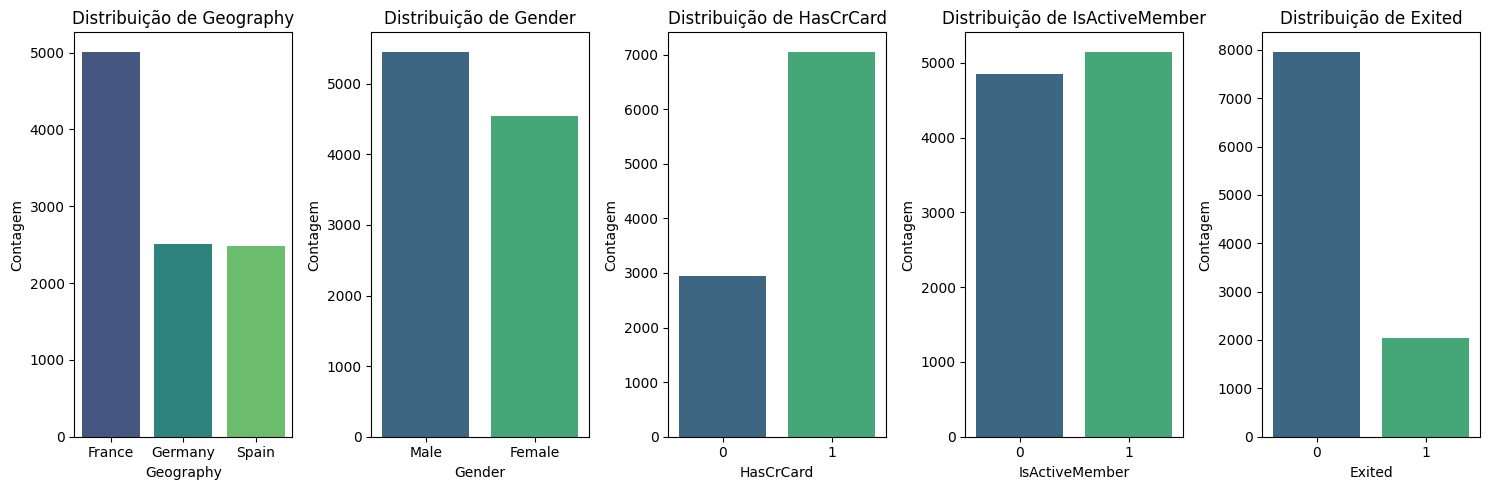

In [4]:
# Estatísticas descritivas para variáveis quantitativas
quantitativa_col = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
quantitativa_contagem = df[quantitativa_col].describe()

# Lista das colunas qualitativas
qualitativa_col = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

# Dicionário para armazenar as distribuições de cada variável qualitativa
qualitativa_contagem = {}

# Loop para calcular a distribuição de cada variável qualitativa
for col in qualitativa_col:
    qualitativa_contagem[col] = df[col].value_counts()

display(md("### `Estatísticas Descritivas para Variáveis Quantitativas:`"))
display(quantitativa_contagem)
display(md("### `Distribuição das Variáveis Qualitativas:`"))


fig, axes = plt.subplots(1, 5, figsize=(15, 5))
axes = axes.flatten()

for i, (col, cont) in enumerate(qualitativa_contagem.items()):
    sns.barplot(x=cont.index, y=cont.values, palette="viridis", ax=axes[i])
    axes[i].set_title(f'Distribuição de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Contagem')



plt.tight_layout()
plt.show()

#### Qual é a relação entre a pontuação de crédito (CreditScore), saldo da conta (Balance) e a taxa de churn?

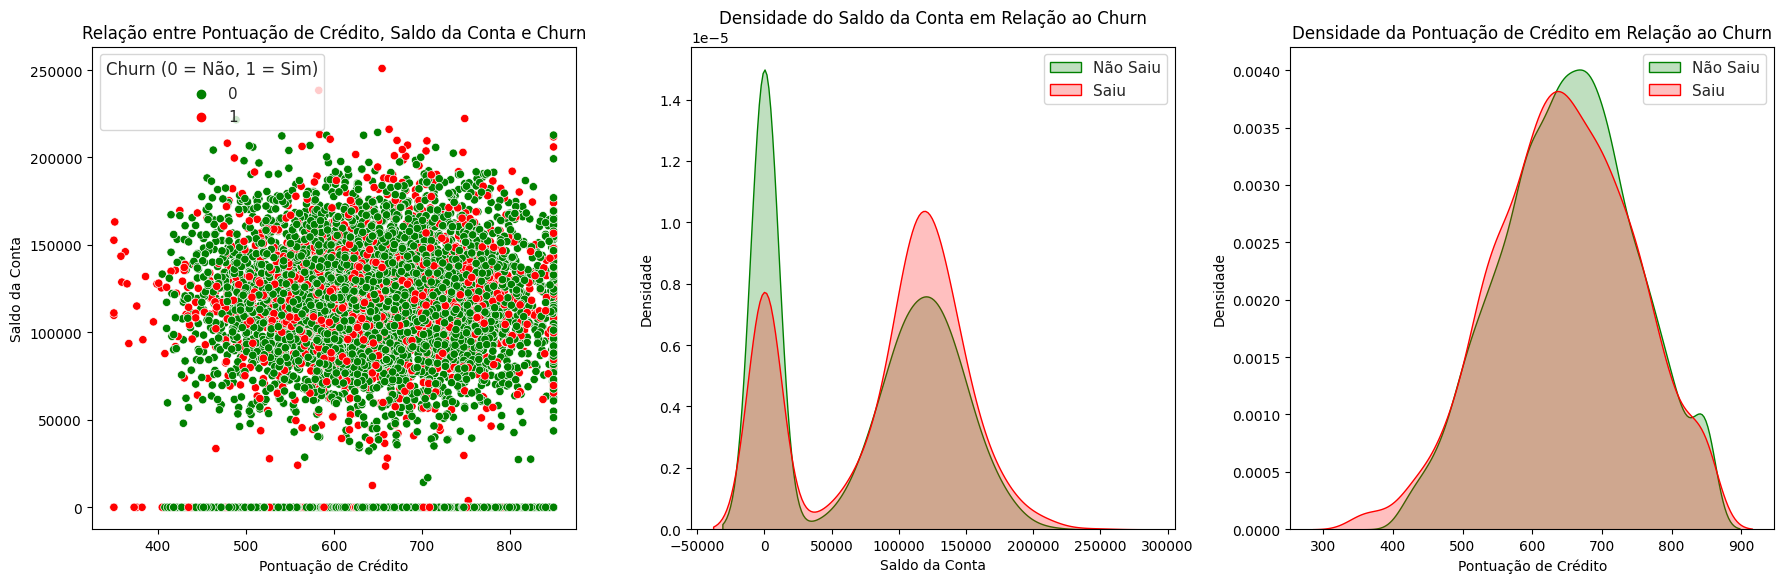

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.set(style="whitegrid")

# Criar o gráfico de dispersão
scatter_plot = sns.scatterplot(x='CreditScore', y='Balance', hue='Exited', data=df,ax=axs[0], palette=['green','red'])
axs[0].set_title('Relação entre Pontuação de Crédito, Saldo da Conta e Churn')
axs[0].set_xlabel('Pontuação de Crédito')
axs[0].set_ylabel('Saldo da Conta')
axs[0].legend(title='Churn (0 = Não, 1 = Sim)')

# Gráfico de densidade para saldo
sns.kdeplot(data=df[df['Exited'] == 0], x='Balance', label='Não Saiu', shade=True, ax=axs[1], color='green')
sns.kdeplot(data=df[df['Exited'] == 1], x='Balance', label='Saiu', shade=True, ax=axs[1], color='red')
axs[1].set_title('Densidade do Saldo da Conta em Relação ao Churn')
axs[1].set_xlabel('Saldo da Conta')
axs[1].set_ylabel('Densidade')
axs[1].legend()

# Gráfico de densidade para credito
sns.kdeplot(data=df[df['Exited'] == 0], x='CreditScore', label='Não Saiu', shade=True, ax=axs[2], color='green')
sns.kdeplot(data=df[df['Exited'] == 1], x='CreditScore', label='Saiu', shade=True, ax=axs[2], color='red')
axs[2].set_title('Densidade da Pontuação de Crédito em Relação ao Churn')
axs[2].set_xlabel('Pontuação de Crédito')
axs[2].set_ylabel('Densidade')
axs[2].legend()



plt.tight_layout()
plt.show()

`Gráfico de densidade do Saldo da Conta em relação ao Churn:`  
- Dois Picos de Saídas de Clientes: Existem dois picos na curva vermelha (clientes que saíram):
  - **Saldo Zerado:** Um pico significativo indica que muitos clientes com saldo zerado saíram do banco.
  - **Saldo entre 100000 e 150000 Reais:** Outro pico indica uma alta concentração de churn nessa faixa de saldo.

`Gráfico de densidade de Pontuação de Crédito em relação ao Churn:`  
- Um Pico de Saídas de Clientes: Existe um pico na curva vermelha (clientes que saíram) na faixa de pontuação de crédito entre 600 e 700. Isso indica uma maior concentração de churn nessa faixa de pontuação.

---

#### Existe relação entre idade do cliente e a predisposição ao churn?

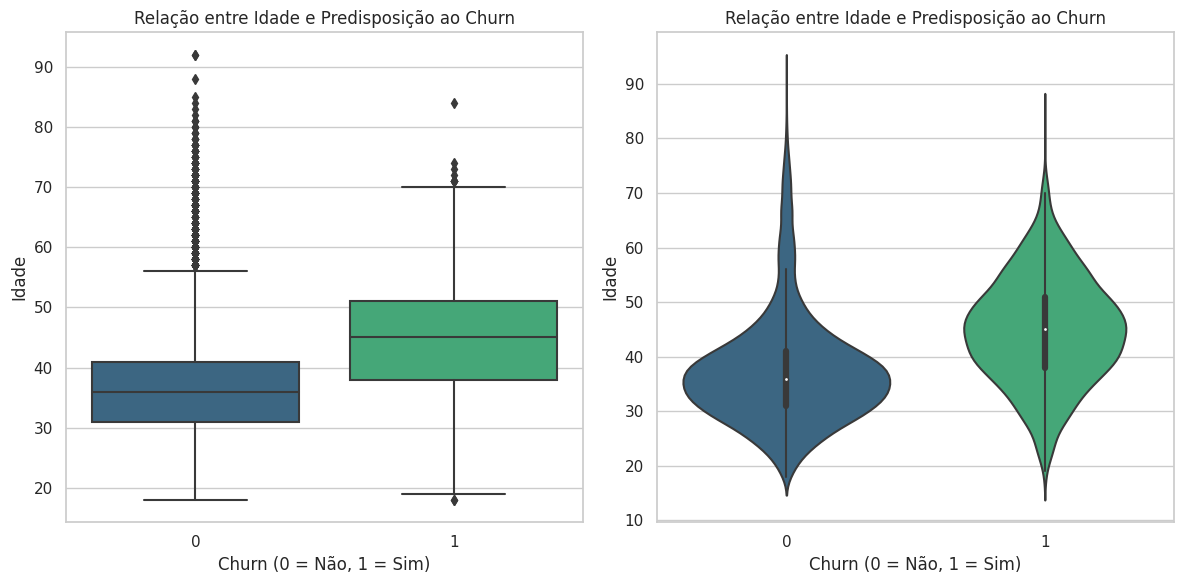

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.set(style="whitegrid")

# Gráfico boxplot
sns.boxplot(x='Exited', y='Age', data=df, ax=axs[0], palette='viridis')
axs[0].set_title('Relação entre Idade e Predisposição ao Churn')
axs[0].set_xlabel('Churn (0 = Não, 1 = Sim)')
axs[0].set_ylabel('Idade')

# Gráfico de violino
sns.violinplot(x='Exited', y='Age', data=df, ax=axs[1], palette='viridis', split=True)
axs[1].set_title('Relação entre Idade e Predisposição ao Churn')
axs[1].set_xlabel('Churn (0 = Não, 1 = Sim)')
axs[1].set_ylabel('Idade')

plt.tight_layout()
plt.show()


- A mediana da idade dos clientes que saíram é 45 anos, enquanto a mediana dos clientes que não saíram é 35 anos. Isso sugere que clientes mais velhos têm uma maior tendência a sair do banco.
- Embora a maioria dos clientes que saíram esteja na faixa dos 40 a 50 anos, há também clientes mais jovens e mais velhos que estão saindo.
- Para clientes que não saíram (Exited = 0), há muitos outliers acima de 57 anos. Isso indica que, embora a maioria dos clientes que permanecem no banco esteja abaixo de 57 anos, há uma quantidade significativa de clientes mais velhos que permanecem.
- Para clientes que saíram (Exited = 1), há poucos outliers acima de 70 anos e um outlier abaixo de 19 anos. Isso sugere que, embora a maioria dos clientes que saíram esteja na faixa dos 40 a 50 anos, há alguns casos extremos de clientes muito jovens ou muito velhos que também saíram.
- **O gráfico de violino para clientes que saíram do banco é mais fino, isso indica que a distribuição de idades dos clientes que saíram é mais dispersa, com menos concentração em faixas etárias específicas. Isso pode significar que os clientes que saem do banco estão distribuídos em uma faixa etária mais ampla, sem uma concentração significativa em uma faixa específica.**
---

#### A taxa de churn varia entre diferentes regiões ou países?

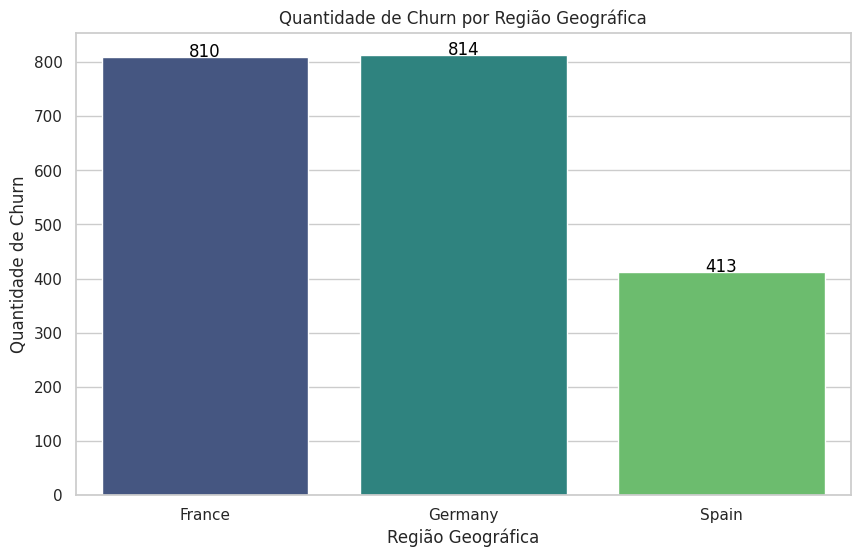

In [7]:
churn_by_geography = df[df['Exited'] == 1].groupby('Geography')['Exited'].count().reset_index(name='Churn Count')

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Geography', y='Churn Count', data=churn_by_geography, palette='viridis')

bar_plot.set_title('Quantidade de Churn por Região Geográfica')
bar_plot.set_xlabel('Região Geográfica')
bar_plot.set_ylabel('Quantidade de Churn')

# Adicionar os números nas barras
for index, row in churn_by_geography.iterrows():
    bar_plot.text(row.name, row['Churn Count'], round(row['Churn Count'], 2), color='black', ha="center")

# Mostrar o gráfico
plt.show()

- França vs. Alemanha: A quantidade de churn é bastante semelhante entre a França e a Alemanha, com a Alemanha tendo um número ligeiramente maior. Isso pode indicar que ambos os mercados enfrentam desafios semelhantes em termos de retenção de clientes.

---

#### Existe relação entre a taxa de churn, salário estimado e pontuação de crédito dos clientes?

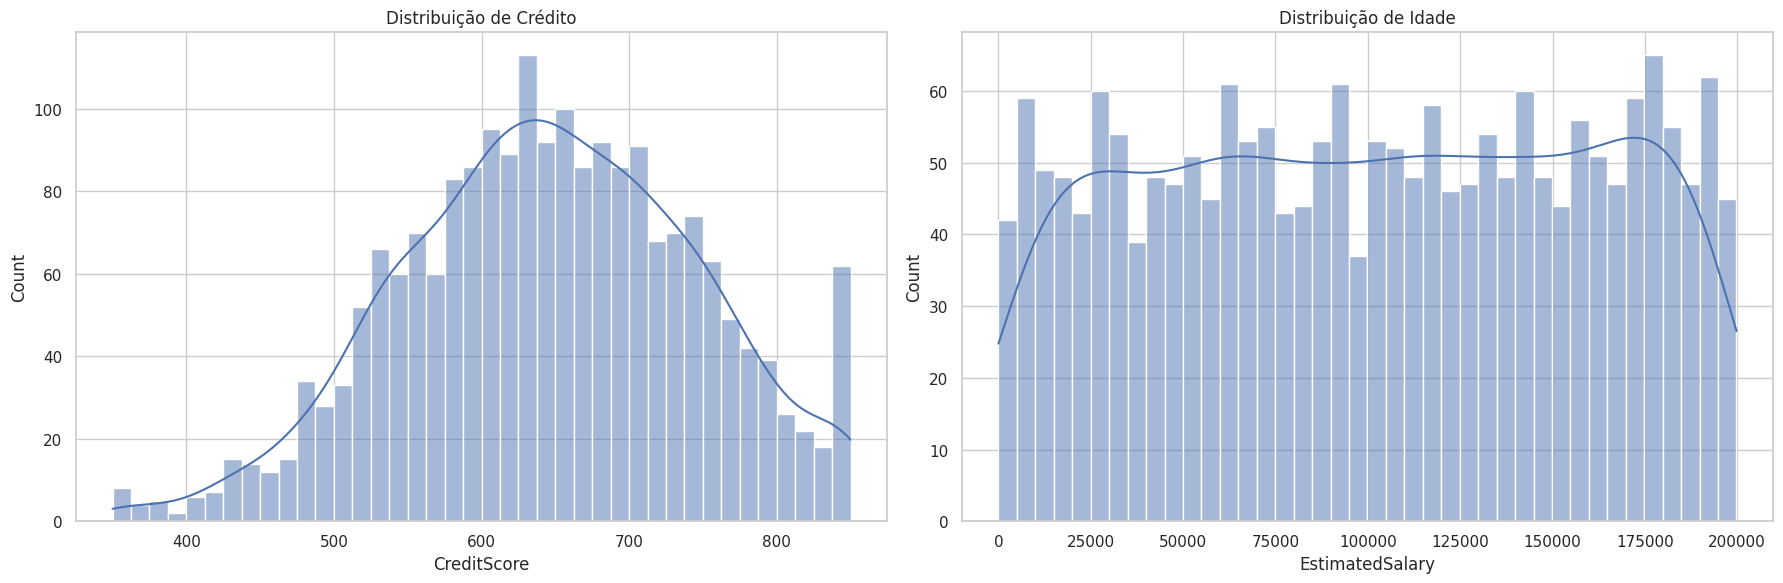

In [8]:
# Gráfico histograma
df_churn = df[df['Exited'] == 1]

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(df_churn['CreditScore'], bins=40, kde=True, ax=axes[0])
axes[0].set_title('Distribuição de Crédito')

sns.histplot(df_churn['EstimatedSalary'], bins=40, kde=True, ax=axes[1])
axes[1].set_title('Distribuição de Idade')


plt.tight_layout()
plt.show()

- O pico da distribuição de crédito está entre aproximadamente 600 e 700.  
- A distribuição uniforme do salário estimado sugere que o salário não é um fator determinante para a rotatividade dos clientes. Isso pode indicar que clientes de diferentes faixas salariais estão igualmente propensos a sair do banco, e outros fatores podem estar influenciando mais a decisão de churn.

---

# 3. Insights

---
`Clientes com Saldo Zerado:` Clientes com saldo zerado têm uma alta probabilidade de churn. Portanto, o banco pode implementar estratégias para engajar esses clientes, como oferecer incentivos para manter um saldo positivo ou fornecer serviços adicionais que possam aumentar a retenção.  

`Clientes com Saldo entre 100000 e 150000 Reais:` Há uma alta concentração de churn entre clientes com saldo nessa faixa. Logo, banco pode investigar as razões específicas para o churn nessa faixa de saldo e desenvolver programas de fidelidade ou benefícios exclusivos para esses clientes.  

`Clientes com Pontuação de Crédito entre 600 e 700:` O banco pode oferecer produtos financeiros personalizados, como taxas de juros mais baixas ou linhas de crédito especiais, para melhorar a satisfação e retenção desses clientes.  

---
`Clientes na Faixa dos 40 a 50 Anos:` Clientes na faixa dos 40 a 50 anos têm uma maior tendência a sair do banco. O banco deve investigar as necessidades e preocupações específicas desse grupo etário e desenvolver estratégias de retenção direcionadas, como ofertas personalizadas, melhores taxas de juros ou serviços exclusivos.  

`Clientes Mais Velhos:` A presença de muitos outliers acima de 57 anos entre os clientes que não saíram sugere que há um grupo significativo de clientes mais velhos que permanecem leais ao banco. O banco deve continuar a oferecer serviços que atendam às necessidades desse grupo.  

`Clientes Jovens:` Embora haja poucos outliers jovens que saíram, o banco deve monitorar os clientes mais jovens (abaixo de 30 anos) para entender suas expectativas e comportamentos. Programas de fidelidade, educação financeira e produtos bancários voltados para jovens podem ajudar a aumentar a retenção nesse grupo.

---
`França vs. Alemanha:` Dado que os números são próximos, pode haver problemas comuns que afetam os clientes em ambas as regiões. O banco deve investigar fatores como qualidade do serviço, taxas, produtos oferecidos e atendimento ao cliente para identificar possíveis causas de insatisfação.

---

`Clientes com Salários Estimados Variados:` Dado que o salário estimado não apresenta picos significativos, o banco deve focar em analisar outros fatores que podem estar influenciando a rotatividade, como a qualidade do atendimento ao cliente, a competitividade dos produtos oferecidos e a experiência geral do cliente.

---
